# **Plant Disease Classification**

---

![alt text](https://cdn-images-1.medium.com/max/1200/1*FswlF4lZPQ4kT_gkybacZw.jpeg)


# Introduction

Getting affected by a disease is very common in plants due to various factors such as fertilizers, cultural practices followed, environmental conditions, etc. These diseases hurt agricultural yield and eventually the economy based on it. 

Any technique or method to overcome this problem and getting a warning before the plants are infected would aid farmers to efficiently cultivate crops or plants, both qualitatively and quantitatively. Thus, disease detection in plants plays a very important role in agriculture.


# Download Dataset


First, we download the `PlantVillage` dataset from Google Drive by using the unique `id` it holds and unzip the downloaded **PlantVillage.zip** into the **PlantVillage** dataset folder.

In [ ]:
# Download a file based on its file ID.
file_id = '18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn'

# Download dataset
!gdown https://drive.google.com/uc?id={file_id}

# Unzip the downloaded file
!unzip -q PlantVillage.zip

Downloading...
From: https://drive.google.com/uc?id=18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn
To: /content/PlantVillage.zip
866MB [00:09, 87.4MB/s]


# Import Libraries


Importing necessary libraries and modules required to build the classification model.

In [ ]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np
from keras import optimizers




In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import json
import time

import joblib
import keras
import tensorflow
from keras.engine.saving import load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D, concatenate, AveragePooling2D
from keras import models
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
#from keras.callbacks import tensorboard_v1

# Load Dataset

Initializing a few parameters required for the image dataset preprocessing.

In [ ]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((224, 224))

# Number of images used to train the model
N_IMAGES = 100

# Path to the dataset folder
root_dir = './PlantVillage'

train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import pathlib


In [ ]:

data_dir = root_dir
#'../input/intel-image-classification'


AUTOTUNE = tf.data.experimental.AUTOTUNE
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
#val_batches = tf.data.experimental.cardinality(validation_dataset)
#test_dataset = validation_dataset.take(val_batches // 5)
#validation_dataset = validation_dataset.skip(val_batches // 5)

#print('Number of validation baches: %d'%tf.data.experimental.cardinality(validation_dataset))
#print('Number of test batches:%d'% tf.data.experimental.cardinality(test_dataset))

In [ ]:


#print(train_dataset.class_indices)


In [ ]:


def get_data_filenames():
    train_ds = tf.data.Dataset.list_files(data_dir+"/train/*/*.jpg")
    val_ds = tf.data.Dataset.list_files(data_dir+"/val/*/*.jpg",shuffle=False,seed=1)
   # test_ds = tf.data.Dataset.list_files(data_dir+"/seg_pred/seg_pred/*.jpg",shuffle=False,seed=1)
    return train_ds,val_ds#,test_ds



In [ ]:



def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  class_names = get_class_names(data_dir)
  one_hot = parts[-2] == class_names
  return tf.argmax(one_hot)




def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label




def load_data():
    train_ds,val_ds = get_data_filenames()
    #,test_ds
    train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)
    #test_ds = test_ds.map(process_path, num_parallel_calls=AUTOTUNE)
    return train_ds, val_ds
    #, test_ds 




def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds




In [ ]:



def get_class_names(data_dir):
    data_dir = pathlib.Path(data_dir)
    class_names = np.array(sorted([item.name for item in data_dir.glob('train/*') ]))
    return class_names




def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  return tf.image.resize(img, [img_height, img_width])



def inception_module(x_inp,kernel_size):
    print("\n*** inception  start ***\n")
    x1 = tf.keras.layers.Conv2D(kernel_size['x1'], 1, strides=1, padding='same',kernel_initializer='glorot_normal')(x_inp)
    x1 = tf.keras.activations.relu(x1, alpha=0.01)
    print("x1: " , x1.shape)


    x1_3 = tf.keras.layers.Conv2D(kernel_size['x1_3'], 1, strides=1, padding='same',kernel_initializer='glorot_normal')(x_inp)
    x1_3 = tf.keras.activations.relu(x1_3, alpha=0.01)
    print("x1_3: " ,x1_3.shape)
    x3 = tf.keras.layers.Conv2D(kernel_size['x3'], 3, strides=1, padding='same',kernel_initializer='glorot_normal')(x1_3)
    x3 = tf.keras.activations.relu(x3, alpha=0.01)
    print("x3: ", x3.shape)


    x1_5 = tf.keras.layers.Conv2D(kernel_size['x1_5'], 1,strides=1, padding='same',kernel_initializer='glorot_normal')(x_inp)
    x1_5 = tf.keras.activations.relu(x1_5, alpha=0.01)
    print("x1_5: ",x1_5.shape)
    x5 = tf.keras.layers.Conv2D(kernel_size['x5'], 5,strides=1, padding='same',kernel_initializer='glorot_normal')(x1_5)
    x5 = tf.keras.activations.relu(x5, alpha=0.01)
    print("x5: ",x5.shape)


    x_pool = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=1, padding='same')(x_inp)
    print("x_pool: ",x_pool.shape)
    x_pool_proj = tf.keras.layers.Conv2D(kernel_size['x_pool_proj'],1,strides=1, padding='same',kernel_initializer='glorot_normal')(x_pool)
    x_pool_proj = tf.keras.activations.relu(x_pool_proj, alpha=0.01)
    print("x_pool_proj: ",x_pool_proj.shape)


    x_out = tf.keras.layers.Concatenate(axis=-1)([x1, x3, x5, x_pool_proj])
    print("x_out: ",x_out.shape)
    print("\n*** inception  end ***\n")


    return x_out




def bell_module(x_inp,i):
    print("\n*** bell start ***\n")
    #bellAvgPool1
    y = tf.keras.layers.MaxPooling2D(pool_size=5, strides=3, padding='valid')(x_inp)
    print("avgPool: ",y.shape)


    #bellDropout1
    y = tf.keras.layers.Dropout(.4)(y)


    #conv1
    y = tf.keras.layers.Conv2D(64, 1, strides=1,padding='same',kernel_initializer='glorot_normal')(y)
    print("conv1: ",y.shape)


    #bellfcLayer
    # extra fc layer added in this usecase
    y = tf.keras.layers.Flatten()(y)
    print("input: ", y.shape)
    y = tf.keras.layers.Dense(512,kernel_initializer='glorot_normal')(y)
    y = tf.keras.activations.relu(y, alpha=0.01)
    print("fc1: ", y.shape)
    y = tf.keras.layers.Dense(128,kernel_initializer='glorot_normal')(y)
    y = tf.keras.activations.relu(y, alpha=0.01)
    print("fc2: ", y.shape)
    y_out1 = tf.keras.layers.Dense(39,kernel_initializer='glorot_normal',name="bell"+i)(y)
    print("fc3 output : ", y_out1.shape)
    print("\n*** bell  end ***\n")
    return y_out1
  






def googlenet_dev():
    inputs = tf.keras.Input(shape=(img_height,img_width,3))
    print("input: ", inputs.shape)


    #conv1
    x = tf.keras.layers.Conv2D(64, 7, strides=2,padding='same',kernel_initializer='glorot_normal')(inputs)
    print("conv1: " ,x.shape)
    x = tf.keras.activations.relu(x, alpha=0.01)


    #maxPool1
    x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    print("maxPool1: ", x.shape)
    x = tf.keras.layers.BatchNormalization()(x)


    #conv2
    x = tf.keras.layers.Conv2D(192, 1, strides=1,padding='valid',kernel_initializer='glorot_normal')(x)
    print("conv2: ", x.shape)
    x = tf.keras.activations.relu(x, alpha=0.01)
    x = tf.keras.layers.BatchNormalization()(x)


    #conv3
    x = tf.keras.layers.Conv2D(192, 3, strides=2,padding='same',kernel_initializer='glorot_normal')(x)
    x = tf.keras.activations.relu(x, alpha=0.01)
    print("conv3: ", x.shape)


    #3a
    kernel_size ={'x1':64,'x1_3':96,'x3':128,'x1_5':16,'x5':32,'x_pool_proj':32}
    x= inception_module(x,kernel_size)
    print("inception 3a: ",x.shape)


    #3b
    kernel_size ={'x1':128,'x1_3':128,'x3':192,'x1_5':32,'x5':96,'x_pool_proj':64}
    x= inception_module(x,kernel_size)
    print("inception 3b: ",x.shape)


    #maxPool2
    x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    print("maxPool2: ", x.shape)


    #4a
    kernel_size ={'x1':192,'x1_3':96,'x3':208,'x1_5':16,'x5':48,'x_pool_proj':64}
    x= inception_module(x,kernel_size)
    print("inception 4a: ",x.shape)


    y1_out = bell_module(x,"1")


    #4b
    kernel_size ={'x1':160,'x1_3':112,'x3':224,'x1_5':24,'x5':64,'x_pool_proj':64}
    x= inception_module(x,kernel_size)
    print("inception 4b: ",x.shape)


    #4c
    kernel_size ={'x1':128,'x1_3':128,'x3':256,'x1_5':24,'x5':64,'x_pool_proj':64}
    x= inception_module(x,kernel_size)
    print("inception 4c: ",x.shape)


    #4d
    kernel_size ={'x1':112,'x1_3':144,'x3':288,'x1_5':32,'x5':64,'x_pool_proj':64}
    x= inception_module(x,kernel_size)
    print("inception 4d: ",x.shape)


    y2_out = bell_module(x,"2")


    #4e
    kernel_size ={'x1':256,'x1_3':160,'x3':320,'x1_5':32,'x5':128,'x_pool_proj':128}
    x= inception_module(x,kernel_size)
    print("inception 4e: ",x.shape)


    #maxPool2
    x = tf.keras.layers.MaxPooling2D(pool_size=7, strides=2, padding='same')(x)
    print("maxPool3: ", x.shape)




    #5a
    kernel_size ={'x1':256,'x1_3':160,'x3':320,'x1_5':32,'x5':128,'x_pool_proj':128}
    x= inception_module(x,kernel_size)
    print("inception 5a: ",x.shape)


    #5b
    kernel_size ={'x1':384,'x1_3':192,'x3':384,'x1_5':48,'x5':128,'x_pool_proj':128}
    x= inception_module(x,kernel_size)
    print("inception 5b: ",x.shape)


    #avgPool
    x = tf.keras.layers.AveragePooling2D(pool_size=7, strides=1, padding='valid')(x)
    print("avgPool1: ", x.shape)


    #dropout
    x = tf.keras.layers.Dropout(.4)(x)


    #fcLayer
    # extra fc layer added in this usecase
    x = tf.keras.layers.Flatten()(x)
    print("input: ", x.shape)
    x = tf.keras.layers.Dense(512,kernel_initializer='glorot_normal')(x)
    x = tf.keras.activations.relu(x, alpha=0.01)
    print("fc1: ", x.shape)
    x = tf.keras.layers.Dense(128,kernel_initializer='glorot_normal')(x)
    x = tf.keras.activations.relu(x, alpha=0.01)
    print("fc2: ", x.shape)
    x_out = tf.keras.layers.Dense(39,kernel_initializer='glorot_normal',name ="main_bell")(x)
    print("fc3 output: ", x_out.shape)


    googlenet = tf.keras.Model(inputs=inputs,outputs=[y1_out,y2_out,x_out])
    return googlenet

   


In [ ]:
def plot_graph(metric_type):
    plt.plot(history.history['main_bell_'+metric_type])
    plt.plot(history.history['bell2_'+metric_type])
    plt.plot(history.history['bell1_'+metric_type])
    plt.plot(history.history['val_main_bell_'+metric_type])
    plt.plot(history.history['val_bell2_'+metric_type])
    plt.plot(history.history['val_bell1_'+metric_type])
    plt.title('model '+metric_type)
    plt.ylabel(metric_type)
    plt.xlabel('epoch')
    plt.legend(['main_bell_'+metric_type,'bell2_'+metric_type,'bell1_'+metric_type,'val_main_bell_'+metric_type,'val_bell2_'+metric_type,'val_bell1_'+metric_type], loc='lower right')
    plt.show()







In [ ]:
train_ds, val_ds = load_data()
#, test_ds
#train_ds,val_ds,test_ds = get_data_filenames()

In [ ]:
print("training data size",tf.data.experimental.cardinality(train_ds).numpy())
print("validation data size",tf.data.experimental.cardinality(val_ds).numpy())
#print("test data size",tf.data.experimental.cardinality(test_ds).numpy())

training data size 1777
validation data size 438


In [ ]:
    for image, label in train_ds.take(1):
      print("Image shape: ", image.numpy().shape)
      print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  10


In [ ]:
validation_dataset = val_ds
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation baches: %d'%tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches:%d'% tf.data.experimental.cardinality(test_dataset))
val_ds = validation_dataset
test_ds = test_dataset

Number of validation baches: 351
Number of test batches:87


In [ ]:
  train_ds = configure_for_performance(train_ds)
  val_ds = configure_for_performance(val_ds)
  test_ds = configure_for_performance(test_ds)

In [ ]:
    googlenet = googlenet_dev()
    googlenet.compile(
        optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001, decay_steps=439, decay_rate=0.5, staircase=False), beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
        name='Adam'),
        loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

input:  (None, 224, 224, 3)
conv1:  (None, 112, 112, 64)
maxPool1:  (None, 56, 56, 64)
conv2:  (None, 56, 56, 192)
conv3:  (None, 28, 28, 192)

*** inception  start ***

x1:  (None, 28, 28, 64)
x1_3:  (None, 28, 28, 96)
x3:  (None, 28, 28, 128)
x1_5:  (None, 28, 28, 16)
x5:  (None, 28, 28, 32)
x_pool:  (None, 28, 28, 192)
x_pool_proj:  (None, 28, 28, 32)
x_out:  (None, 28, 28, 256)

*** inception  end ***

inception 3a:  (None, 28, 28, 256)

*** inception  start ***

x1:  (None, 28, 28, 128)
x1_3:  (None, 28, 28, 128)
x3:  (None, 28, 28, 192)
x1_5:  (None, 28, 28, 32)
x5:  (None, 28, 28, 96)
x_pool:  (None, 28, 28, 256)
x_pool_proj:  (None, 28, 28, 64)
x_out:  (None, 28, 28, 480)

*** inception  end ***

inception 3b:  (None, 28, 28, 480)
maxPool2:  (None, 14, 14, 480)

*** inception  start ***

x1:  (None, 14, 14, 192)
x1_3:  (None, 14, 14, 96)
x3:  (None, 14, 14, 208)
x1_5:  (None, 14, 14, 16)
x5:  (None, 14, 14, 48)
x_pool:  (None, 14, 14, 480)
x_pool_proj:  (None, 14, 14, 64)
x_out

In [60]:
history = googlenet.fit(train_ds,
        validation_data=val_ds,
        epochs=25)

Epoch 1/25
56/56 [==============================] - 522s 9s/step - loss: 5.1922 - bell1_loss: 1.4883 - bell2_loss: 1.8201 - main_bell_loss: 1.8839 - bell1_accuracy: 0.6719 - bell2_accuracy: 0.6004 - main_bell_accuracy: 0.5305 - val_loss: 3.1842 - val_bell1_loss: 1.1221 - val_bell2_loss: 1.0746 - val_main_bell_loss: 0.9874 - val_bell1_accuracy: 0.5726 - val_bell2_accuracy: 0.5812 - val_main_bell_accuracy: 0.5812
Epoch 2/25
56/56 [==============================] - 534s 10s/step - loss: 0.7998 - bell1_loss: 0.2261 - bell2_loss: 0.2607 - main_bell_loss: 0.3130 - bell1_accuracy: 0.9345 - bell2_accuracy: 0.9316 - main_bell_accuracy: 0.9129 - val_loss: 5.5452 - val_bell1_loss: 1.3383 - val_bell2_loss: 1.9945 - val_main_bell_loss: 2.2124 - val_bell1_accuracy: 0.6125 - val_bell2_accuracy: 0.6040 - val_main_bell_accuracy: 0.5954
Epoch 3/25
56/56 [==============================] - 492s 9s/step - loss: 0.4192 - bell1_loss: 0.1184 - bell2_loss: 0.1438 - main_bell_loss: 0.1570 - bell1_accuracy: 0.94

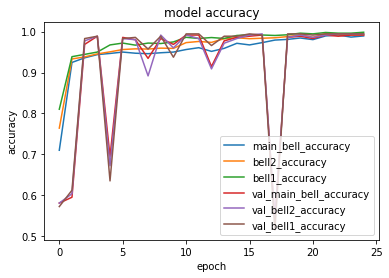

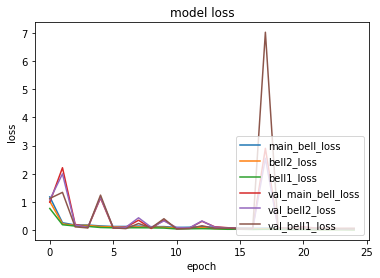

In [61]:
plot_graph('accuracy')
plot_graph('loss')



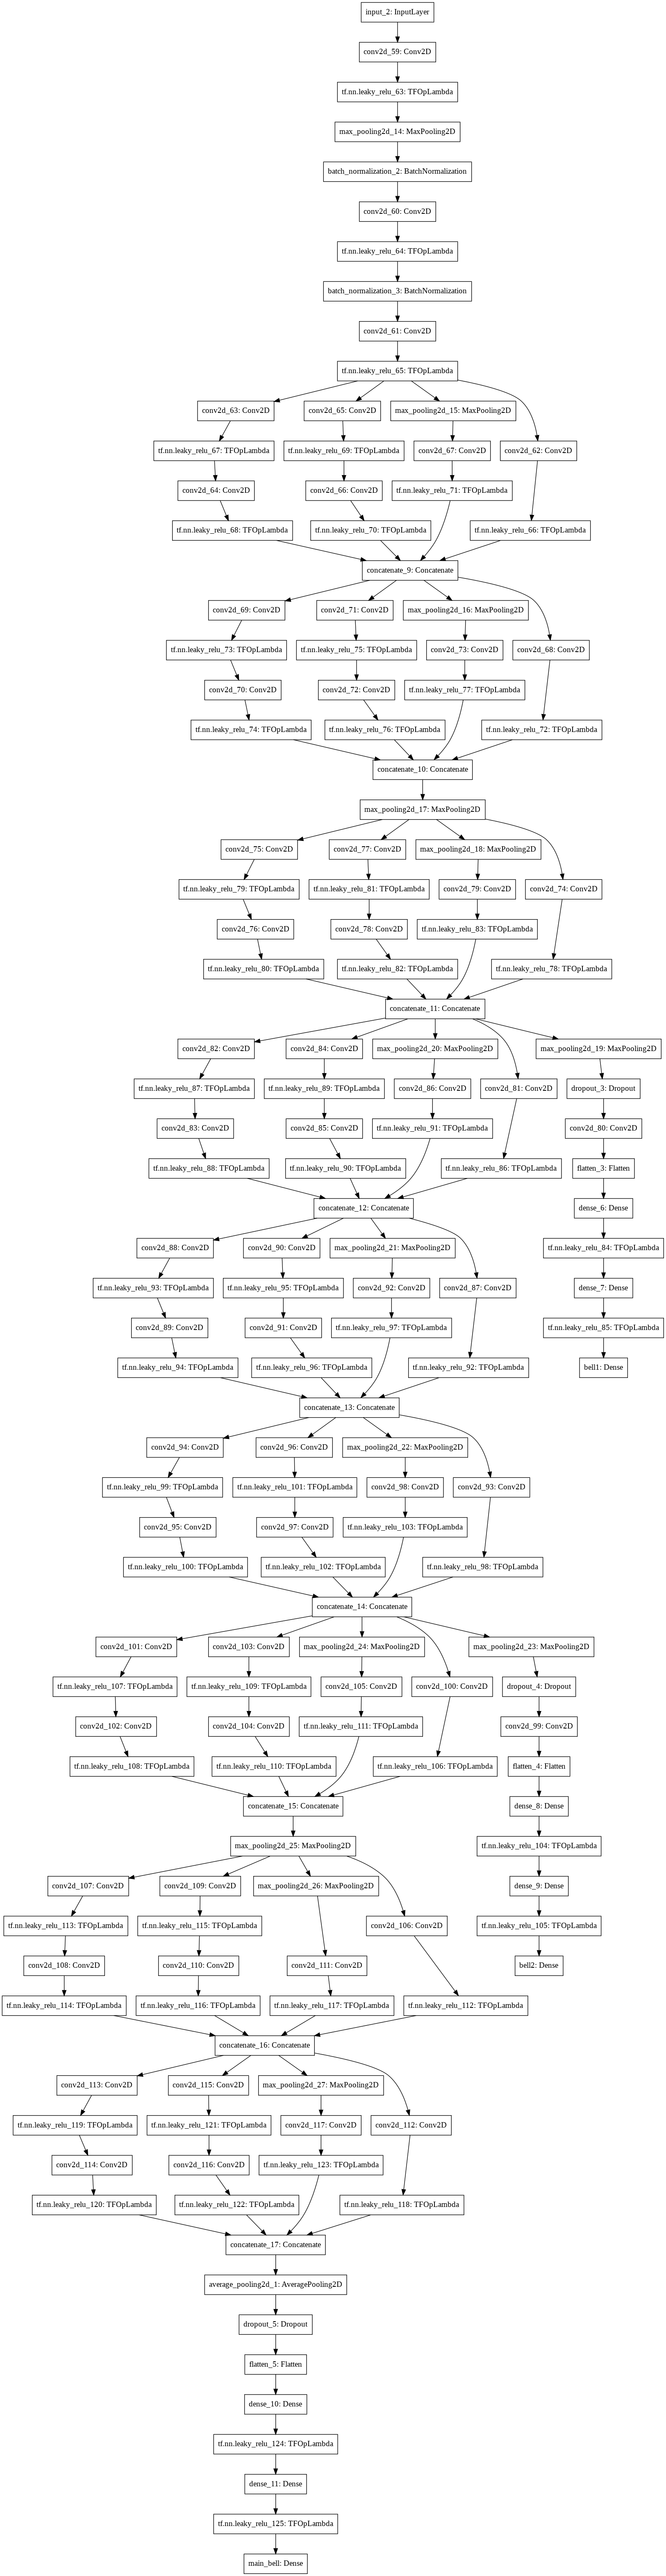

In [62]:
tf.keras.utils.plot_model(googlenet, "googleNet_compuationc_graph.png")

In [64]:
#loss, accuracy = model.evaluate(test_dataset)
#print('Test accuracy :', accuracy)
print("[INFO] Calculating model accuracy")
scores = googlenet.evaluate(test_ds)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
3/3 [==============================] - 6s 2s/step - loss: 1.2979 - bell1_loss: 0.3609 - bell2_loss: 0.5783 - main_bell_loss: 0.3587 - bell1_accuracy: 0.8966 - bell2_accuracy: 0.8506 - main_bell_accuracy: 0.8621
Test Accuracy: 36.0888808965683


In [ ]:
x_test = test_ds

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string

y_pred = googlenet.predict(x_test)

labels = string.digits+string.ascii_lowercase+string.ascii_uppercase
plt.subplots(figsize=(20,20))
sns.heatmap(confusion_matrix(np.argmax(y_pred, axis=1)), xticklabels=labels, yticklabels=labels)

In [65]:
# Dump pickle file of the model
#import pickle
#print("[INFO] Saving model...")
#pickle.dump(googlenet, open('plant_disease_classification_model.pkl', 'wb'))
# save the model to disk
print("[INFO] serializing network...")
googlenet.save('googlenet_flower.h5')

!pip install tensorflowjs
!tensorflowjs_converter --input_format keras "googlenet_flower.h5" /content/jj

[INFO] serializing network...
     |████████████████████████████████| 71kB 2.9MB/s 
     |████████████████████████████████| 112kB 4.8MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0
2021-01-08 14:51:27.685933: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
# Dump pickle file of the labels
#print("[INFO] Saving label transform...")
#filename = 'plant_disease_label_transform.pkl'
#image_labels = pickle.load(open(filename, 'rb'))
# construct the argument parser and parse the arguments
# import the necessary packages

In [66]:
from keras.models import load_model

In [67]:
# load the trained convolutional neural network
print("[INFO] loading network...")
image_labels = load_model('googlenet_flower.h5')
# classify the input image
#(notSanta, santa) = model.predict(image)[0]

[INFO] loading network...


We write the following `predict_disease` function to predict the class or disease of a plant image. 

We just need to provide the complete path to the image and it displays the image along with its prediction class or plant disease.

In [68]:
def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    result = googlenet.predict_classes(np_image)
    print((image_labels.classes_[result][0]))

For testing purposes, we randomly choose images from the dataset and try predicting class or disease of the plant image.

In [ ]:
predict_disease('/content/ColabNotebooks/PlantVillage/Tomato_Leaf_Mold/ffb2d848-e46c-485c-a633-8d6137dd3dbf___Crnl_L.Mold 8735.jpg') 

In [ ]:
predict_disease('/content/PlantVillage/val/Potato___Early_blight/03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG')

Tomato___Target_Spot


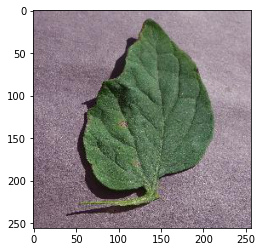

In [ ]:
predict_disease('/content/PlantVillage/val/Tomato___Target_Spot/1006b3dd-22d8-41b8-b83d-08bf189fcdaa___Com.G_TgS_FL 8118.JPG')

Orange___Haunglongbing_(Citrus_greening)


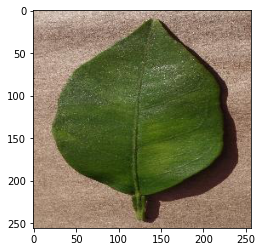

In [ ]:
predict_disease('/content/PlantVillage/val/Orange___Haunglongbing_(Citrus_greening)/02459e0c-a189-4dc9-a0dc-0548e36d0efb___CREC_HLB 5714.JPG')

# Reuse Model

We download the trained model and label transform saved in the Google Drive.

In [ ]:
# Download the trained model file based on its file ID.
file_id = '1E5jNzpM__7z67GRl1cbhHK71yKcPa8wl'
!gdown https://drive.google.com/uc?id={file_id}

# Download the labels file based on its file ID.
file_id = '1WsgEd3TG33Vj_9AAAT_WfJe_AqsuC9uu'
!gdown https://drive.google.com/uc?id={file_id}

Downloading...
From: https://drive.google.com/uc?id=1E5jNzpM__7z67GRl1cbhHK71yKcPa8wl
To: /content/plant_disease_classification_model.pkl
698MB [00:04, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WsgEd3TG33Vj_9AAAT_WfJe_AqsuC9uu
To: /content/plant_disease_label_transform.pkl
100% 8.18k/8.18k [00:00<00:00, 8.17MB/s]


Importing necessary libraries and modules required to build the classification model.

In [ ]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

Load the trained model and its labels for prediction.

In [ ]:
# Load model
filename = 'plant_disease_classification_model.pkl'
model = pickle.load(open(filename, 'rb'))

# Load labels
filename = 'plant_disease_label_transform.pkl'
image_labels = pickle.load(open(filename, 'rb'))

We use the `convert_image_to_array` function to resize an image and `predict_disease` function to predict the class or disease of a plant image.

We just need to provide the complete path to the image and it displays the image along with its prediction class or plant disease.

In [ ]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    result = model.predict_classes(np_image)
    print((image_labels.classes_[result][0]))

Predict disease of any plant image.

Corn_(maize)___Northern_Leaf_Blight


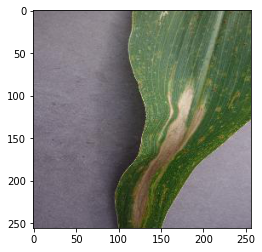

In [ ]:
predict_disease('/content/PlantVillage/val/Corn_(maize)___Northern_Leaf_Blight/028159fc-995e-455a-8d60-6d377580a898___RS_NLB 4023.JPG')